<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/REGRESSION/Model_cheking_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar datos y ajustar modelo regresión lineal

In [11]:
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")

x = mpg['mpg']
y = mpg['weight']
X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model

# Modelo 1 (Lineal): y = a*x + b
model = sm.OLS(y, X)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Visualizar los residuos

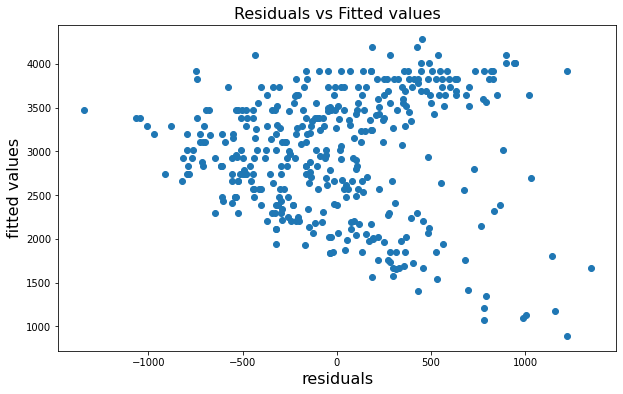

In [12]:
fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,results.fittedvalues)
plt.title('Residuals vs Fitted values',fontsize=16)
plt.ylabel('fitted values',fontsize=16)
plt.xlabel('residuals',fontsize=16)
plt.show()

Test de Homoscetasticidad 

In [13]:
lm,lmp,f,fp = sm.stats.diagnostic.het_breuschpagan(results.resid,model.exog)
print('Lagrange multiplier p-value = {}'.format(lmp))
print('F-score p-value = {}'.format(fp))

Lagrange multiplier p-value = 0.8979088388121204
F-score p-value = 0.898227144600199


Seleccion de modelos con AIC

In [17]:
import numpy as np
import statsmodels.formula.api as smf

degree = 3
weights = np.polyfit(x, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=mpg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1581.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          2.47e-140
Time:                        18:11:43   Log-Likelihood:                -2927.4
No. Observations:                 398   AIC:                             5859.
Df Residuals:                     396   BIC:                             5867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.267e-12     77.093   8.13e-14      1.000    -151.563     151.563
model(x)       1.0000      0.025     39.760      0.000       0.951       1.049
==============================================================================
Omnibus:                        5.066   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.934
Skew:                           0.128   Prob(JB):                       0.0515
Kurtosis:                       3.540   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
print(results.aic)

5858.801044946064


In [27]:
MAX_DEGREE = 15

AIC = []
for dg in range(MAX_DEGREE):
  weights = np.polyfit(x, y, dg)
  model = np.poly1d(weights)
  results = smf.ols(formula='y ~ model(x)', data=mpg).fit()
  AIC.append(results.aic)
  print('Model order {}, AIC = {}'.format(dg+1,results.aic))


Model order 1, AIC = 6496.7188544643295
Model order 2, AIC = 6030.279390002793
Model order 3, AIC = 5862.3075106088945
Model order 4, AIC = 5858.801044946064
Model order 5, AIC = 5854.042049599036
Model order 6, AIC = 5848.5475658857895
Model order 7, AIC = 5847.269703015238
Model order 8, AIC = 5847.264090588203
Model order 9, AIC = 5846.480851886774
Model order 10, AIC = 5846.306958285515
Model order 11, AIC = 5846.06986389552
Model order 12, AIC = 5845.801349838069
Model order 13, AIC = 5845.262017241633
Model order 14, AIC = 5845.131211926962
Model order 15, AIC = 5842.200218433838


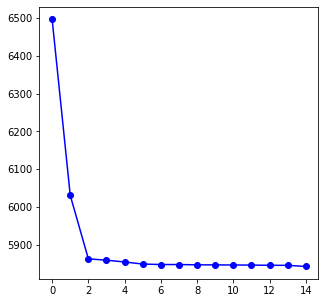

In [26]:
fig = plt.figure(figsize=(5,5))
plt.plot(AIC,'bo-')
plt.show()